# TBmodels

## Setup

In [1]:
%%capture
%%bash
pip install tbmodels

In [1]:
import tbmodels

## Load model from Wannier90 output

In [2]:
model = tbmodels.Model.from_wannier_folder?

In [3]:
model = tbmodels.Model.from_wannier_folder(
    folder='wannier_output/', prefix='wannier90', pos_kind='nearest_atom')

In [4]:
model.eigenval((0.1234, 0.43626, 0.243521435))

array([-4.02466876, -4.02456442,  1.17604909,  1.17610485,  3.1594572 ,
        3.15952682,  4.59618211,  4.59628984,  9.08379095,  9.08385425,
       10.1105708 , 10.11062579, 11.21504986, 11.21512655, 12.57946299,
       12.57960058])

In [5]:
model.hamilton((0.324645, 0.2435235, 0.123413))

array([[ 5.88625115e+00+0.00000000e+00j, -1.63127213e-01-4.62618946e-01j,
        -4.87944567e-01-3.39963393e-01j, -1.16600390e+00-7.93465183e-01j,
         7.77438380e-01+2.47729069e+00j, -2.81430686e+00-1.34262211e+00j,
        -2.35018802e+00-1.04871822e+00j, -2.66904040e+00-8.97061151e-01j,
         1.25873787e-04-1.60148640e-04j, -5.85215441e-03+3.67539656e-04j,
         2.17804513e-04+6.99329912e-03j,  5.14696016e-03-6.21924383e-03j,
        -3.85744473e-04+9.97884019e-05j, -1.89669344e-04-6.71966324e-04j,
        -6.00744044e-04-1.58854309e-03j,  4.87613205e-04+2.42563572e-03j],
       [-1.63127213e-01+4.62618946e-01j,  5.87466066e+00+0.00000000e+00j,
        -1.57510975e+00+5.77424332e-01j, -8.07407670e-01+2.41213591e-01j,
         2.37886742e+00+1.87770934e+00j, -2.26233855e+00+3.66560338e-01j,
         1.61885785e+00+1.90259505e+00j,  1.57586142e+00+1.47190266e+00j,
         6.11531356e-03+3.88656936e-04j, -1.45141374e-04-8.68765790e-05j,
        -5.11026571e-03-5.79589231e-0

### Plot bandstructure with bands-inspect

In [6]:
%%capture
%%bash
pip install bands-inspect

In [7]:
import bands_inspect as bi

In [8]:
kpts_path = bi.kpoints.KpointsPath(
    paths=[[r'$\Gamma$', 'X', 'U'], ['K', r'$\Gamma$', 'L', 'W', 'X']],
    special_points={
        r'$\Gamma$': (0, 0, 0),
        'X': (0.5, 0, 0.5),
        'U': (0.625, 0.25, 0.625),
        'K': (0.375, 0.375, 0.75),
        'L': (0.5, 0.5, 0.5),
        'W': (0.5, 0.25, 0.75),
    },
    unit_cell=model.uc,
    kpoint_distance=0.01)

In [9]:
eigenvals = bi.eigenvals.EigenvalsData.from_eigenval_function(
    kpoints=kpts_path,
    eigenval_function=model.eigenval
)

<IPython.core.display.Javascript object>


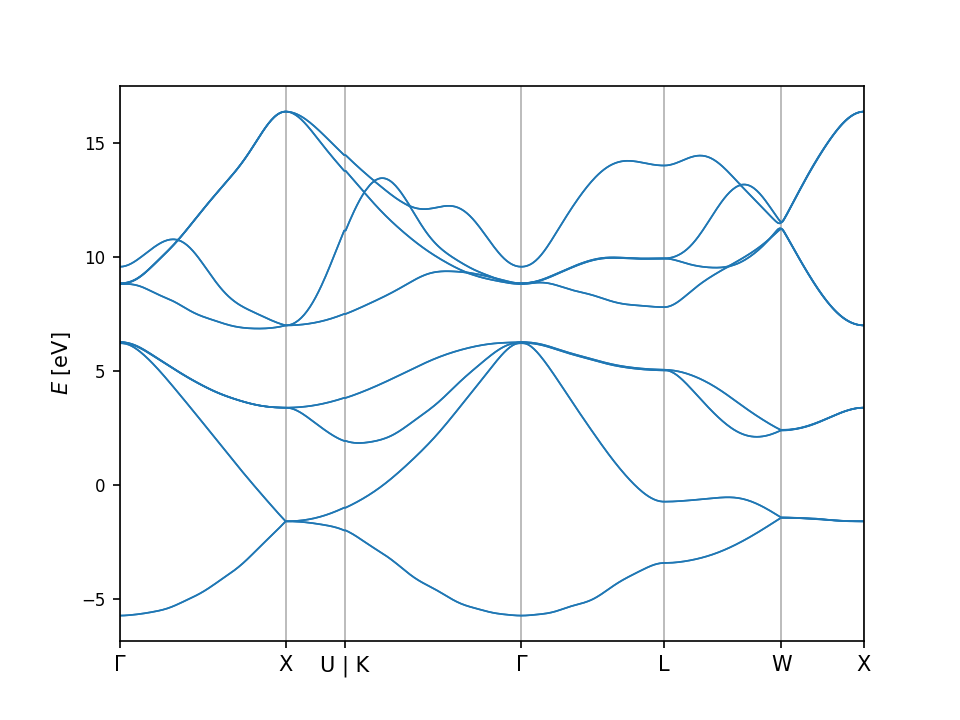

In [10]:
%matplotlib notebook
bi.plot.eigenvals(eigenvals);

## Symmetrization

In [11]:
import symmetry_representation as sr

In [12]:
symmetries = sr.io.load('symmetries.hdf5')

/home/greschd/.virtualenvs/tools_intro_clean/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [13]:
symmetries

SymmetryGroup(full_group=False, symmetries=[SymmetryOperation(real_space_operator=RealSpaceOperator(numeric=True, rotation_matrix=array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), translation_vector=array([0., 0., 0.])), repr=Representation(has_cc=True, matrix=array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.-1.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.-0.j, 0.-1.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.-0.j, 0.-0.j, 0.-1.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.-0.j, 0.-0.j, 0.-0.j, 0.-1.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-1.j, 0.-0.j, 0.-0.j, 0.-0.j],

In [14]:
model.symmetrize(symmetries=symmetries.symmetries, full_group=symmetries.full_group)

tbmodels.Model(hop={(3, 1, -7): np.array([[ 8.00000000e-06+1.16666667e-06j, 6.95000000e-05+1.25000000e-06j, 6.65000000e-05+1.50000000e-06j, -6.65000000e-05-1.25000000e-06j, 3.32187500e-04+3.12500000e-06j, 1.96187500e-04+2.50000000e-06j, 3.36062500e-04+8.75000000e-07j, -5.06250000e-06-2.50000000e-07j, -2.50000000e-07+5.83333333e-07j, -2.30674234e-21+7.50000000e-07j, -5.00000000e-07+1.04808410e-22j, 2.50000000e-07-5.00000000e-07j, -1.25000000e-07-1.12500000e-06j, 8.75000000e-07-2.50000000e-07j, -1.25000000e-07-1.25000000e-07j, -8.75000000e-07-7.50000000e-07j], [ 6.95000000e-05-7.49468103e-22j, 8.00000000e-06-2.50000000e-07j, 6.65000000e-05-5.00000000e-07j, -6.65000000e-05+2.50000000e-07j, -3.31875000e-05-1.62500000e-06j, 4.28812500e-04-2.25000000e-06j, 2.93750000e-06-6.25000000e-07j, 2.06250000e-06-8.48596801e-22j, 1.25000000e-06-7.50000000e-07j, 1.16666667e-06-5.83333333e-07j, 1.50000000e-06-1.04904292e-22j, -1.25000000e-06+5.00000000e-07j, 1.25000000e-07-3.75000000e-07j, 1.12500000e-06

In [15]:
model_symm = _

### Comparison of band structures

In [16]:
eigenvals_symm = bi.eigenvals.EigenvalsData.from_eigenval_function(
    kpoints=kpts_path,
    eigenval_function=model_symm.eigenval
)

<IPython.core.display.Javascript object>


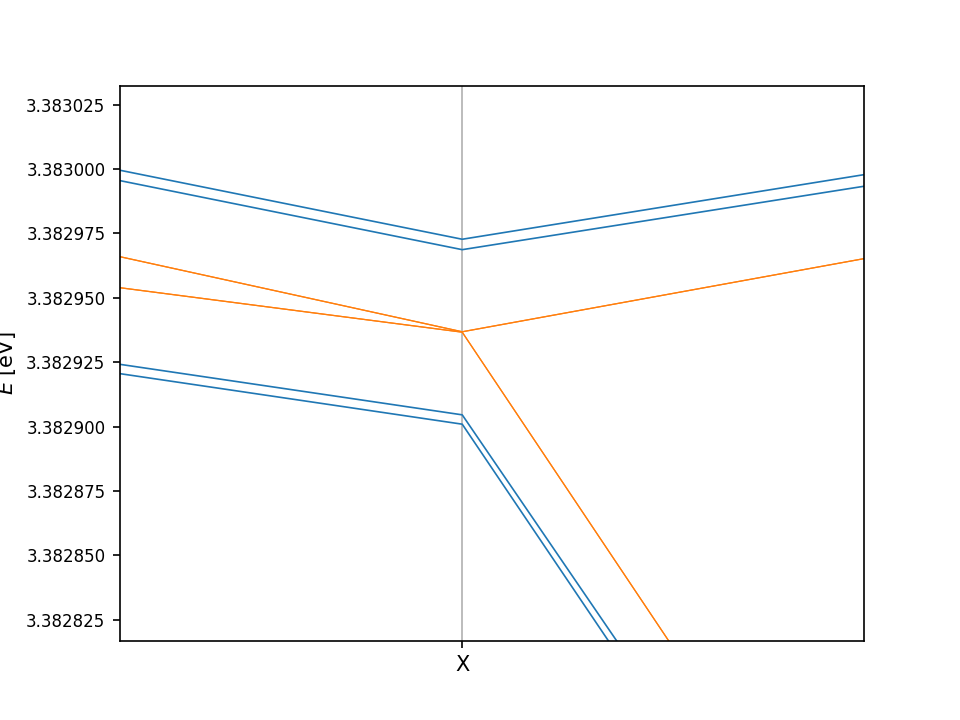

In [17]:
%matplotlib notebook
fig = bi.plot.eigenvals(eigenvals)
bi.plot.eigenvals(eigenvals_symm, ax=fig.gca(), plot_options=dict(color='C1', lw=0.6))

## Create k.p model

In [53]:
kp_model = model.construct_kdotp((0.25, 0.25, 0.25), order=2)

### Compare band structures

In [54]:
eigenvals_kp = bi.eigenvals.EigenvalsData.from_eigenval_function(
    kpoints=kpts_path,
    eigenval_function=lambda k: kp_model.eigenval(np.array(k) - (0.25, 0.25, 0.25))
)

In [49]:
kp_model.eigenval((0., 0., 0.))

array([-5.61459648, -5.61458963,  5.09643019,  5.09643267,  6.02997182,
        6.02997402,  6.06074751,  6.06076027,  8.82895083,  8.82895533,
        9.10965692,  9.10965836,  9.13280237,  9.13281855, 10.61266634,
       10.61266948])

In [50]:
model.eigenval((0.1, 0.1, 0.1))

array([-5.61459648, -5.61458963,  5.09643019,  5.09643267,  6.02997182,
        6.02997402,  6.06074751,  6.06076027,  8.82895083,  8.82895533,
        9.10965692,  9.10965836,  9.13280237,  9.13281855, 10.61266634,
       10.61266948])

<IPython.core.display.Javascript object>


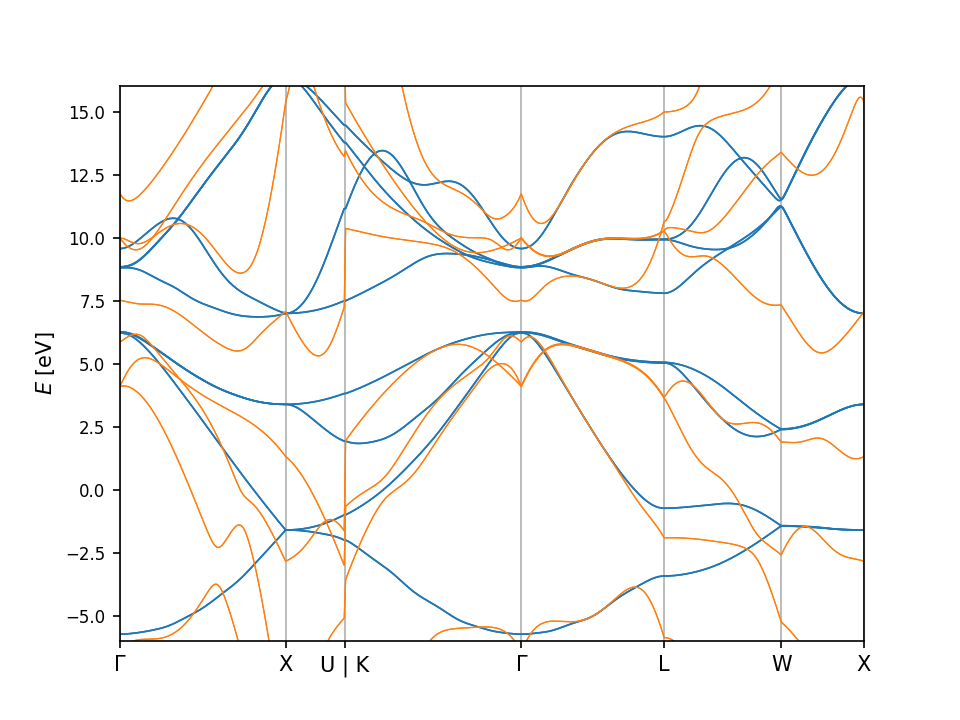

(-6, 16)

In [55]:
%matplotlib notebook
fig = bi.plot.eigenvals(eigenvals)
ax = fig.gca()
bi.plot.eigenvals(eigenvals_kp, ax=ax, plot_options=dict(color='C1', lw=0.6))
ax.set_ylim((-6, 16))